In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Non smoker.csv"

data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:]   # All remaining columns are sensor data

# Convert the timestamp column to datetime
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')  # Handle invalid dates

# Calculate the sampling interval (in seconds)
sampling_interval = (
    pd.to_datetime(data[timestamp_column].iloc[1]) -  # Access a single row
    pd.to_datetime(data[timestamp_column].iloc[0])
).total_seconds()

# Create a relative time axis (in minutes)
data['relative_time_minutes'] = data.index * sampling_interval

# Define axis labels for clarity
axis_labels = ['X-axis', 'Y-axis', 'Z-axis']
colors = {'X': 'blue', 'Y': 'red', 'Z': 'green'}  # Define colors for each signal

In [3]:
from scipy.signal import butter, filtfilt

# Function to apply a low-pass filter
def lowpass_filter(data, cutoff, fs, order=4):
    """
    Apply a low-pass Butterworth filter.
    
    Parameters:
        data (array-like): The signal to filter.
        cutoff (float): The cutoff frequency in Hz.
        fs (float): The sampling frequency in Hz.
        order (int): The order of the filter (default is 4).
    
    Returns:
        array-like: The filtered signal.
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

Nombre total de pics détectés : 2118
Intervalle moyen entre les pics : 2.72 secondes
Cadence moyenne : 81.44 pas par minute


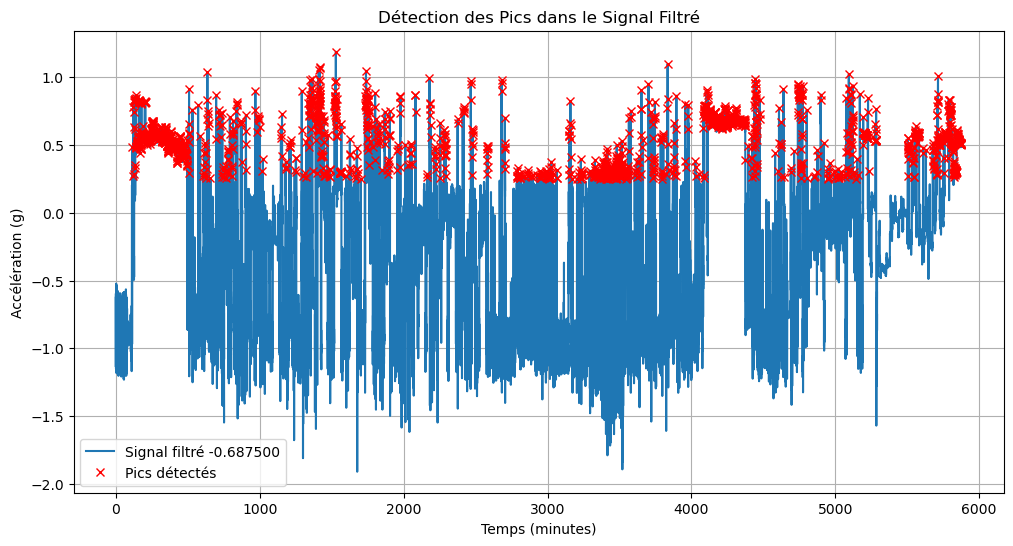

In [10]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#Sélectionner l'axe avec la plus grande variance
signal_columns = data.columns[1:-1]  # Exclure le timestamp et le temps relatif
variances = data[signal_columns].var()
selected_axis = variances.idxmax()

# Définir la fréquence d'échantillonnage et de coupure
fs = 1 / sampling_interval  # Fréquence d'échantillonnage en Hz
cutoff = 2  # Fréquence de coupure en Hz (ajustez si nécessaire)

# Appliquer le filtre passe-bas
data[selected_axis] = lowpass_filter(data[selected_axis], cutoff, fs)

# Détecter les pics dans le signal filtré
peaks, _ = find_peaks(data[selected_axis], height=0.25, distance=fs * 0.1)  # Ajuster les paramètres si nécessaire

# Calculer les temps associés aux pics détectés
peak_times = data['relative_time_minutes'].iloc[peaks]

# Calculer les intervalles entre les pics (en secondes)
intervals = peak_times.diff().dropna()

# Calculer la cadence (pas par seconde)
cadence_per_second = 1 / intervals

# Convertir la cadence en pas par minute
cadence_per_minute = cadence_per_second * 60

# Afficher les statistiques
print(f"Nombre total de pics détectés : {len(peaks)}")
print(f"Intervalle moyen entre les pics : {intervals.mean():.2f} secondes")
print(f"Cadence moyenne : {cadence_per_minute.mean():.2f} pas par minute")

# Visualiser le signal filtré et les pics détectés
plt.figure(figsize=(12, 6))
plt.plot(data['relative_time_minutes'], data[selected_axis], label=f"Signal filtré {selected_axis}")
plt.plot(peak_times, data[selected_axis].iloc[peaks], "x", label="Pics détectés", color='red')
plt.title("Détection des Pics dans le Signal Filtré")
plt.xlabel("Temps (minutes)")
plt.ylabel("Accélération (g)")
plt.legend()
plt.grid(True)
plt.show()

# Le graphique présente un signal filtré représentant  
Une accélération au cours du temps et les croix rouges indiquent les pics détectés dans ce signal.
Nombre total de pics détectés :21181
Ce nombre élevé de pics suggère une activité assez dense dans le signalL'i
Intervalle moyen entre les pics2.72.78 secondes
La fréquence élevée signifie que les événements se produisent rapidement et de manière rapprochLa ée.
Cadence moyen81.4496.76 pas par minute correspond à un rythme soutenu.